In [1]:
import pandas as pd
import numpy as np

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Acquire:

In [2]:
ca = pd.read_csv('22.31.10_CA_videos.csv')
de = pd.read_csv('22.31.10_DE_videos.csv')
fr = pd.read_csv('22.31.10_FR_videos.csv')
gb = pd.read_csv('22.31.10_GB_videos.csv')
ind = pd.read_csv('22.31.10_IN_videos.csv')
jp = pd.read_csv('22.31.10_JP_videos.csv')
kr = pd.read_csv('22.31.10_KR_videos.csv')
mx = pd.read_csv('22.31.10_MX_videos.csv')
ru = pd.read_csv('22.31.10_RU_videos.csv')
us=pd.read_csv('youtube_us.csv')

In [3]:
df = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, us])

In [4]:
df['rank'] = df.index + 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1229 non-null   object
 1   title              1229 non-null   object
 2   publishedAt        1229 non-null   object
 3   channelTitle       1229 non-null   object
 4   categoryId         1229 non-null   object
 5   trending_date      1229 non-null   object
 6   tags               1229 non-null   object
 7   view_count         1229 non-null   object
 8   likes              1229 non-null   object
 9   comment_count      1229 non-null   object
 10  thumbnail_link     1229 non-null   object
 11  comments_disabled  1229 non-null   object
 12  ratings_disabled   1229 non-null   object
 13  description        1211 non-null   object
 14  duration           1229 non-null   object
 15  captions           1229 non-null   object
 16  rank               1229 non-null   int64 
d

In [6]:
df[df.duplicated(['video_id'], keep=False) == True].sort_values(by='rank').drop_duplicates(['video_id'], inplace=True)

In [7]:
df.isnull().sum()

video_id              0
title                 0
publishedAt           0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          18
duration              0
captions              0
rank                  0
dtype: int64

In [8]:
df.description = df.description.fillna('no description')

In [9]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'description', 'duration', 'captions', 'rank'],
      dtype='object')

In [10]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId           object
trending_date        object
tags                 object
view_count           object
likes                object
comment_count        object
thumbnail_link       object
comments_disabled    object
ratings_disabled     object
description          object
duration             object
captions             object
rank                  int64
dtype: object

In [11]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,rank
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30T21:31:19Z,MMAWeekly.com,17,22.31.10,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False,1
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30T17:00:21Z,Yes Theory,24,22.31.10,yestheory|seek discomfort|yes theory strangers...,1168864,53667,3307,https://i.ytimg.com/vi/d2Dw-PuNZSE/default.jpg,False,False,Start your free trial with Shopify at this lin...,PT19M41S,False,2
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31T06:10:01Z,SteveDangle,17,22.31.10,Hockey|NHL|Steve Dangle|Toronto Maple Leafs|Ma...,90257,7248,1946,https://i.ytimg.com/vi/nUDTWLfrUsg/default.jpg,False,False,Steve Dangle recaps and analyzes Game 10 of th...,PT18M54S,True,3
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30T17:59:03Z,Magic: The Gathering,20,22.31.10,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True,4
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30T21:30:06Z,ChrisMD,24,22.31.10,[none],1246886,85865,1222,https://i.ytimg.com/vi/MIHPNoRJ1p0/default.jpg,False,False,Wowie!Save money whilst shopping online by dow...,PT21M36S,False,5


In [12]:
df.ratings_disabled.nunique()

2

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# prepare:

In [13]:
df.categoryId = df.categoryId.astype('object')

In [14]:
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0     2022-10-30 21:31:19+00:00
1     2022-10-30 17:00:21+00:00
2     2022-10-31 06:10:01+00:00
3     2022-10-30 17:59:03+00:00
4     2022-10-30 21:30:06+00:00
                 ...           
195   2022-10-25 19:00:32+00:00
196   2022-10-26 05:00:33+00:00
197   2022-10-23 20:00:40+00:00
198   2022-10-25 22:53:41+00:00
199   2022-10-25 17:36:29+00:00
Name: publishedAt, Length: 1229, dtype: datetime64[ns, UTC]

In [15]:
df.trending_date = '22.31.10'

In [16]:
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0     2022-10-31 00:00:00+00:00
1     2022-10-31 00:00:00+00:00
2     2022-10-31 00:00:00+00:00
3     2022-10-31 00:00:00+00:00
4     2022-10-31 00:00:00+00:00
                 ...           
195   2022-10-31 00:00:00+00:00
196   2022-10-31 00:00:00+00:00
197   2022-10-31 00:00:00+00:00
198   2022-10-31 00:00:00+00:00
199   2022-10-31 00:00:00+00:00
Name: trending_date, Length: 1229, dtype: datetime64[ns, UTC]

In [17]:
df['age']=(df.trending_date - df.publishedAt)

In [18]:
df.age = (df.age.dt.days * 24) + (df.age.dt.seconds/3600)

In [19]:
df[['age']]

,age
0,2.478056
1,6.994167
2,-6.166944
3,6.015833
4,2.498333
...,...
195,124.991111
196,114.990833
197,171.988889
198,121.105278


In [20]:
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [21]:
#adds sponsored column based on appearance of word sponsored in the description
df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
df[df.description.str.contains('sponsored')].shape

(10, 20)

In [22]:
testy = 'PT11H5M38S'

In [23]:
testy

'PT11H5M38S'

In [24]:
testy = list(testy)

In [25]:
testy

['P', 'T', '1', '1', 'H', '5', 'M', '3', '8', 'S']

In [26]:
testy.insert(-3, '00M')

In [27]:
testy = ''.join(testy)

In [28]:
testy

'PT11H5M00M38S'

In [29]:
def clean_duration(duration):
    print(duration)
    if ('S' not in duration) & ('M' not in duration):
        duration += '00M00S'
    elif 'M' not in duration:
        duration = list(duration)
        duration.insert(-3, '00M')
        duration = ''.join(duration)
    elif 'S' not in duration:
        duration += '00S'
    
    if 'H' in duration:
        duration = int(testy.split('H')[0].split('T')[1]) * 3600 + int(duration.split('H')[1].split('M')[0]) * 60 + int(duration.split('M')[1][:-1])
    elif duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [30]:
df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

PT4M5S
PT19M41S
PT18M54S
PT3M24S
PT21M36S
PT34M31S
PT3M52S
PT19M58S
PT3M19S
PT4M7S
PT23M21S
PT16M42S
PT37M29S
PT21M30S
PT38M21S
PT2M56S
PT38M9S
PT26M28S
PT11H5M38S
PT19M19S
PT14M54S
PT2M48S
PT24M46S
PT54S
PT8M3S
PT57S
PT10M14S
PT16M3S
PT29M36S
PT3M33S
PT21M23S
PT16M55S
PT9M58S
PT2M51S
PT39M46S
PT6M36S
PT9M19S
PT2M11S
PT21M9S
PT26M2S
PT17M4S
PT56S
PT15M51S
PT11M56S
PT2M29S
PT13M53S
PT25M43S
PT13M55S
PT10M29S
PT13M59S
PT5M20S
PT2M50S
PT34M55S
PT2M9S
PT14M8S
PT12M36S
PT3M23S
PT20M30S
PT23M58S
PT9M
PT27M50S
PT18M37S
PT2M54S
PT2M22S
PT28M21S
PT55M40S
PT3M29S
PT3M17S
PT16M37S
PT16M35S
PT4M54S
PT1M7S
PT25M21S
PT34M9S
PT2M20S
PT4M
PT18M9S
PT8M5S
PT21S
PT48M55S
PT3M12S
PT29M4S
PT3M54S
PT27M2S
PT17M45S
PT10M59S
PT23M6S
PT3M54S
PT2M9S
PT37M33S
PT28M42S
PT14M57S
PT16M50S
PT2M59S
PT23M27S
PT8M47S
PT3M52S
PT8M26S
PT29M49S
PT1M27S
PT8M2S
PT19M
PT3M37S
PT29M37S
PT25M32S
PT32M52S
PT2M50S
PT29M11S
PT2M50S
PT10M30S
PT3M54S
PT19M22S
PT12M27S
PT19M43S
PT4M4S
PT11M5S
PT21M14S
PT2M4S
PT15M41S
PT3M12S
PT3M59S

In [31]:
#making categorid into actual category titles
#all categoryId optain from youtube website
df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                   ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                   22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                   26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                   29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                   33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                   39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

In [32]:
df['duration']

0       245
1      1181
2      1134
3       204
4      1296
       ... 
195      18
196     200
197    1395
198     577
199     962
Name: duration, Length: 1229, dtype: int64

In [33]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,rank,age,engagement,sponsored
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,245,False,1,2.478056,0.02004,0
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-31 00:00:00+00:00,yestheory|seek discomfort|yes theory strangers...,1168864,53667,3307,https://i.ytimg.com/vi/d2Dw-PuNZSE/default.jpg,False,False,Start your free trial with Shopify at this lin...,1181,False,2,6.994167,0.057231,0
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-31 00:00:00+00:00,Hockey|NHL|Steve Dangle|Toronto Maple Leafs|Ma...,90257,7248,1946,https://i.ytimg.com/vi/nUDTWLfrUsg/default.jpg,False,False,Steve Dangle recaps and analyzes Game 10 of th...,1134,True,3,-6.166944,0.166547,1
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,204,True,4,6.015833,0.001366,0
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-31 00:00:00+00:00,[none],1246886,85865,1222,https://i.ytimg.com/vi/MIHPNoRJ1p0/default.jpg,False,False,Wowie!Save money whilst shopping online by dow...,1296,False,5,2.498333,0.072784,0


In [34]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 199
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           1229 non-null   object             
 1   title              1229 non-null   object             
 2   publishedAt        1229 non-null   datetime64[ns, UTC]
 3   channelTitle       1229 non-null   object             
 4   categoryId         1229 non-null   object             
 5   trending_date      1229 non-null   datetime64[ns, UTC]
 6   tags               1229 non-null   object             
 7   view_count         1229 non-null   object             
 8   likes              1229 non-null   object             
 9   comment_count      1229 non-null   object             
 10  thumbnail_link     1229 non-null   object             
 11  comments_disabled  1229 non-null   object             
 12  ratings_disabled   1229 non-null   object        

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Explore:

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# comments_disabled view count 

In [38]:
def pie_chart1(df):
    labels = pd.concat([df.comments_disabled.value_counts(),df.comments_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['comments_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

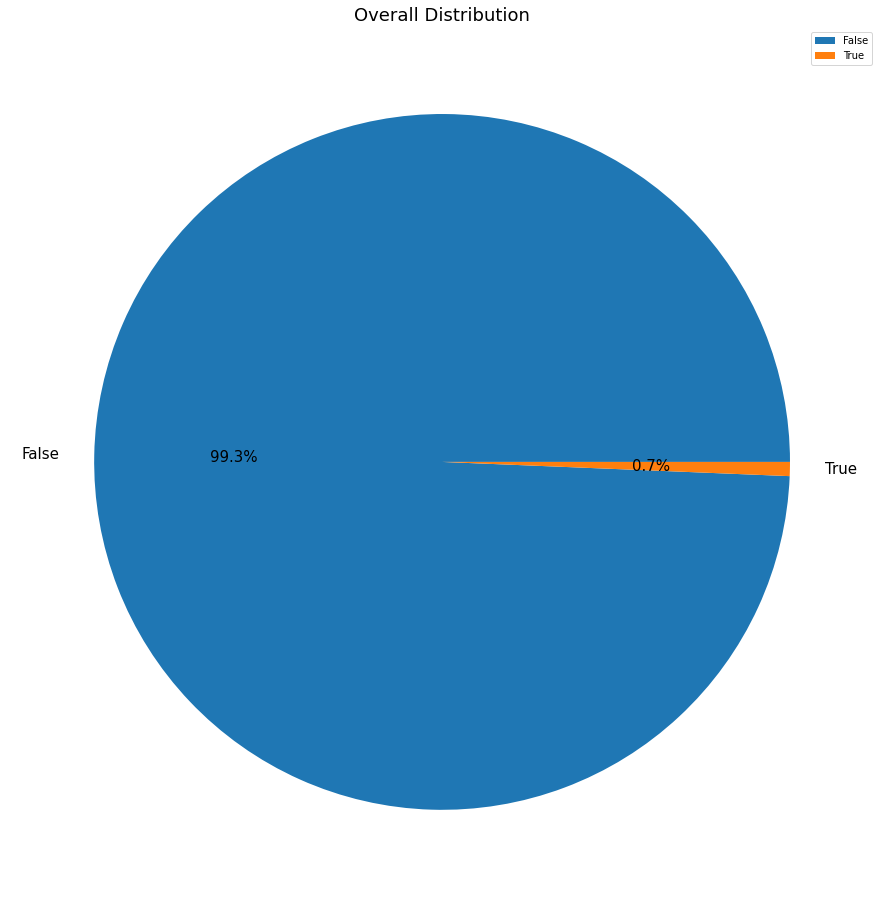

In [39]:
pie_chart1(df)

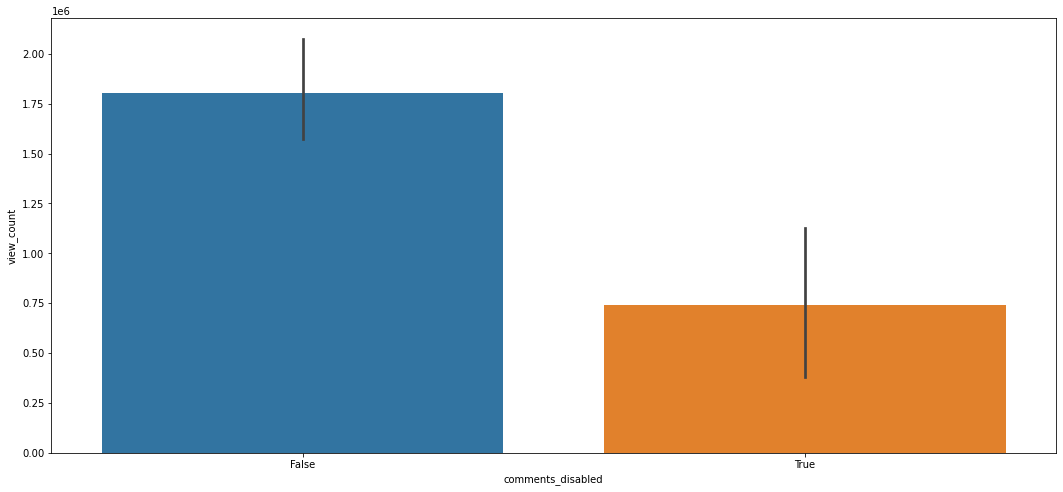

In [37]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='comments_disabled',y='view_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Does comment count effect views per video

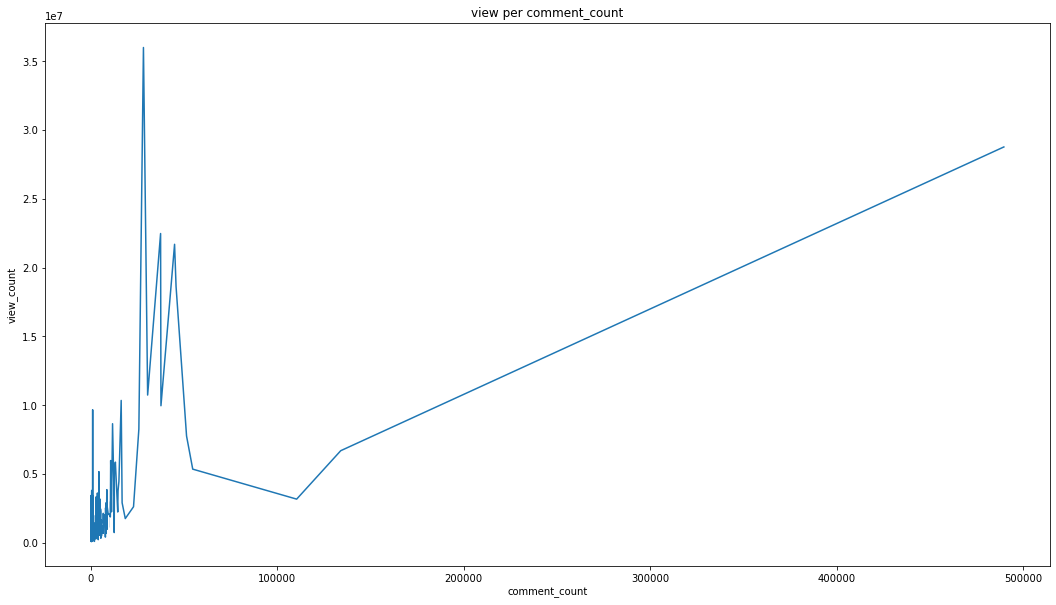

In [40]:
#the amount of comments effect the amoutn. of views 
df = df[~df.index.duplicated()]
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count')
plt.title('view per comment_count')
plt.show()

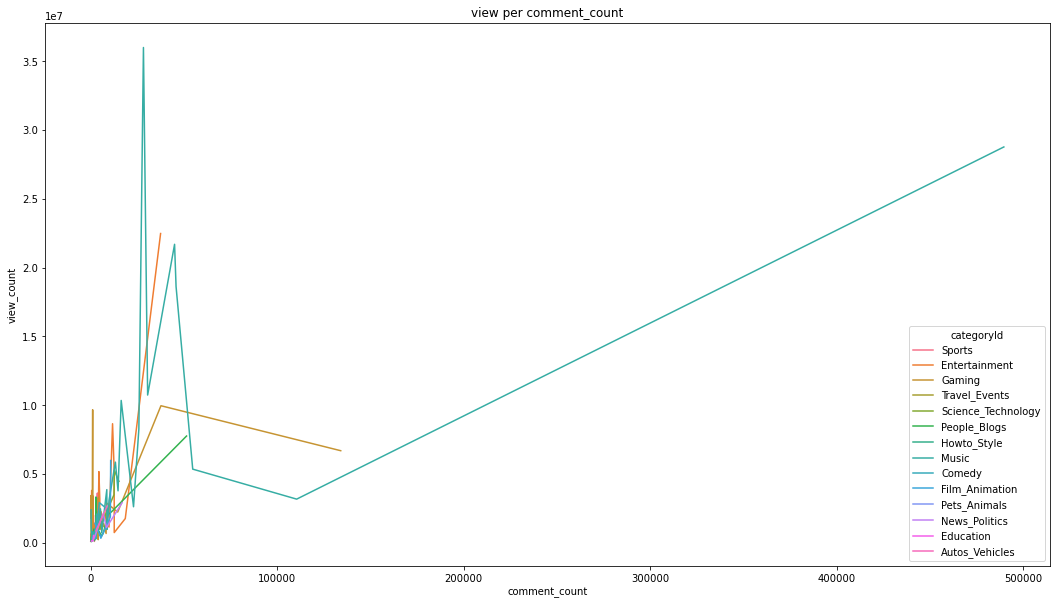

In [41]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count',hue='categoryId')
plt.title('view per comment_count')
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# rating disabled effect views:

In [61]:
def pie_chart2(df):
    labels = pd.concat([df.ratings_disabled.value_counts(),df.ratings_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['ratings_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

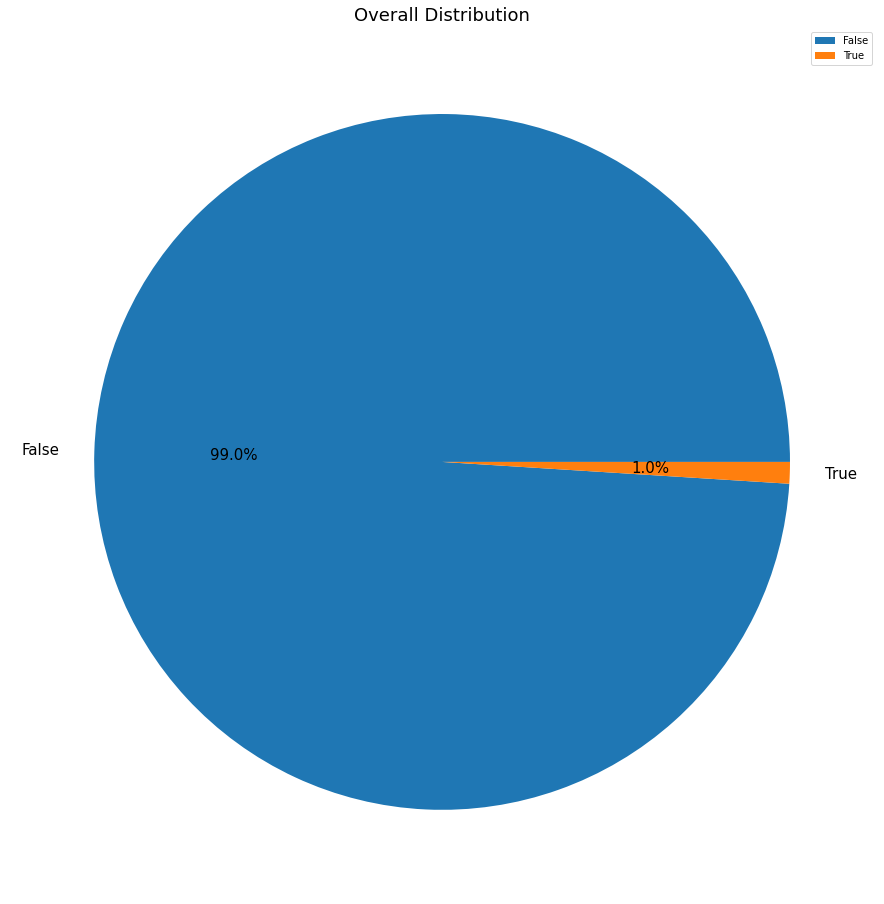

In [62]:
pie_chart2(df)

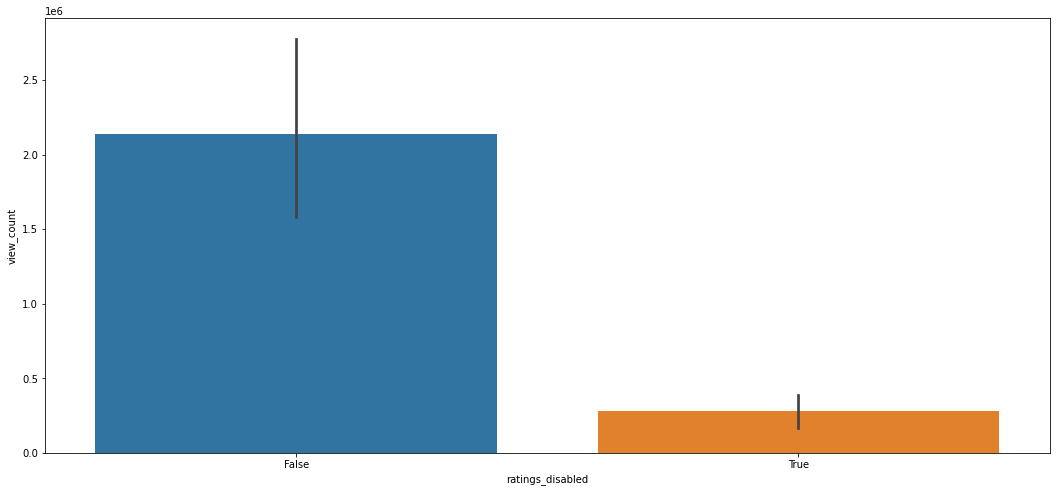

In [42]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='ratings_disabled',y='view_count')
plt.show()

In [43]:
df.ratings_disabled.nunique()

2

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# categoryId to views... 
# Which video category has the largest number of trending videos?

In [44]:
#type of categorys
df.categoryId.unique()

array(['Sports', 'Entertainment', 'Gaming', 'Travel_Events',
       'Science_Technology', 'People_Blogs', 'Howto_Style', 'Music',
       'Comedy', 'Film_Animation', 'Pets_Animals', 'News_Politics',
       'Education', 'Autos_Vehicles'], dtype=object)

In [45]:
#making categorid into actual category titles
# df.categoryId = df.categoryId.map({10: 'Music', 25: 'News_Politics', 20:'Gaming',24:'Entertainment',
#                                       17:'Sports',23:'Comedy',22:'People_Blogs',1:'Film_Animation',28:'Science_Technology',
#                                       2:'Autos_Vehicles',19:'Travel_Events',26:'Howto_Style',27:'Education'})

In [47]:
df.categoryId.unique()

array(['Sports', 'Entertainment', 'Gaming', 'Travel_Events',
       'Science_Technology', 'People_Blogs', 'Howto_Style', 'Music',
       'Comedy', 'Film_Animation', 'Pets_Animals', 'News_Politics',
       'Education', 'Autos_Vehicles'], dtype=object)

In [66]:
def pie_chart2(df):
    labels = pd.concat([df.categoryId.value_counts(),df.categoryId.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['categoryId']
    textprops = {"fontsize":12}
    textprops = {"fontsize":12}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend(loc='lower left')
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

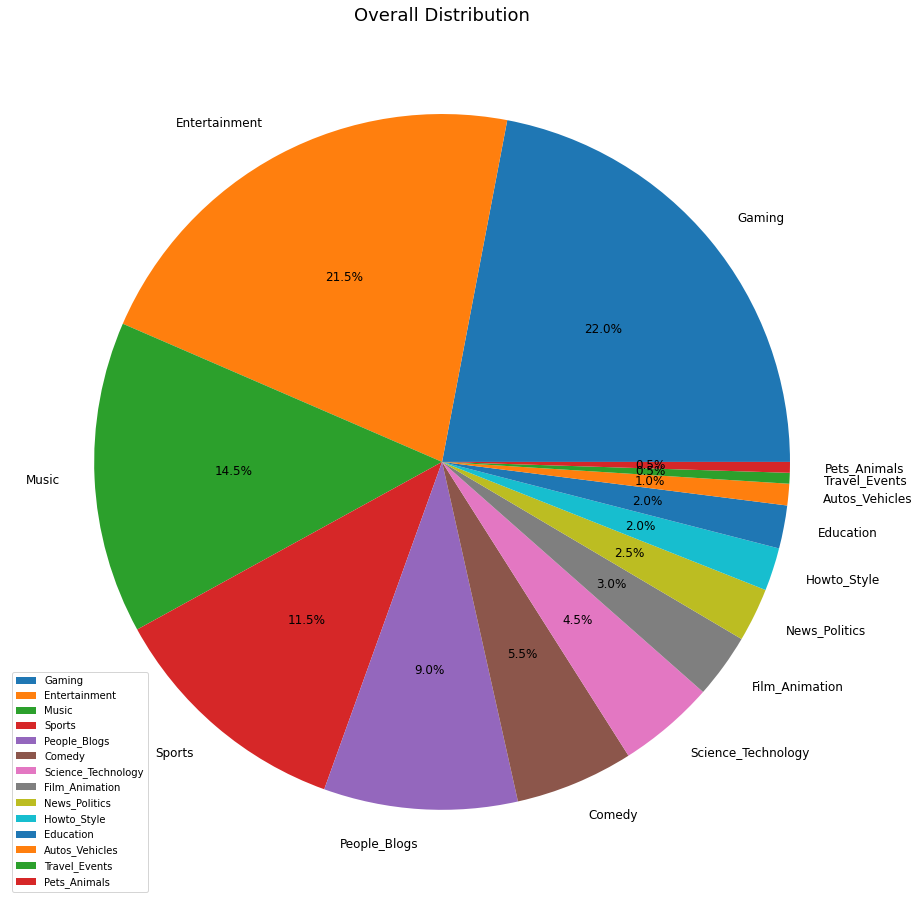

In [67]:
#overall count of category
pie_chart2(df)

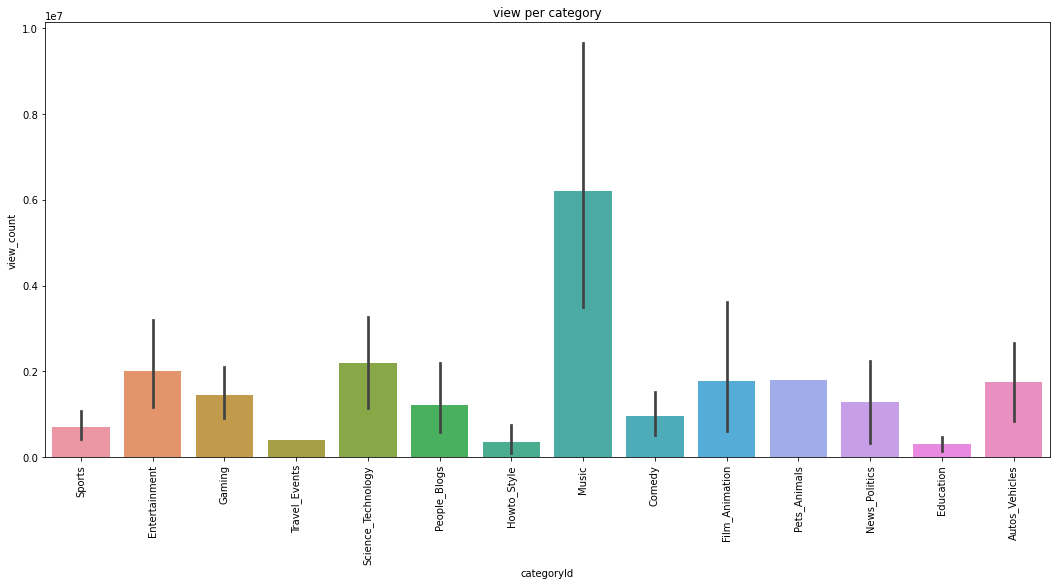

In [68]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

In [51]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10,rotation=90)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12,rotation=90)
        
# def pie_chart1(df):
#     labels = pd.concat([df.clean_lang.value_counts(),df.clean_lang.value_counts(normalize=True)], axis=1)
#     labels.columns = ['n', 'percent']
#     plt.figure(figsize=(16,16))
#     mylabels = df['clean_lang']
#     textprops = {"fontsize":15}
#     textprops = {"fontsize":15}
#     plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
#     plt.legend()
#     plt.title('Overall Language Distribution',fontsize=18)
#     plt.show() 
    

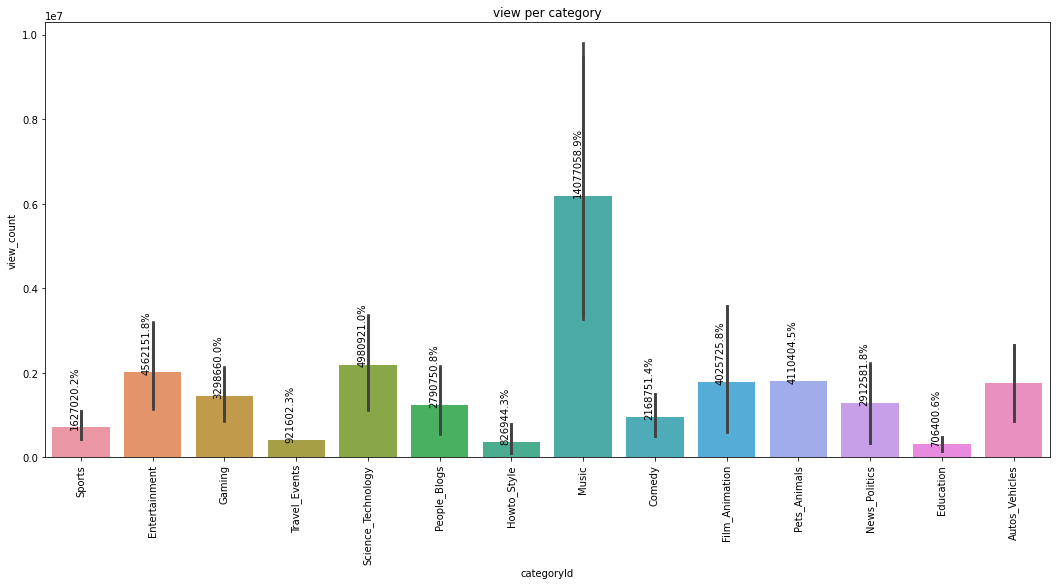

In [52]:
#fix the percentages
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
ax=sns.barplot(data=df,x='categoryId',y='view_count')
with_hue(ax, df.categoryId,1,13)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# duration effecct view count !
# Does that information change based on length, category, and global region?


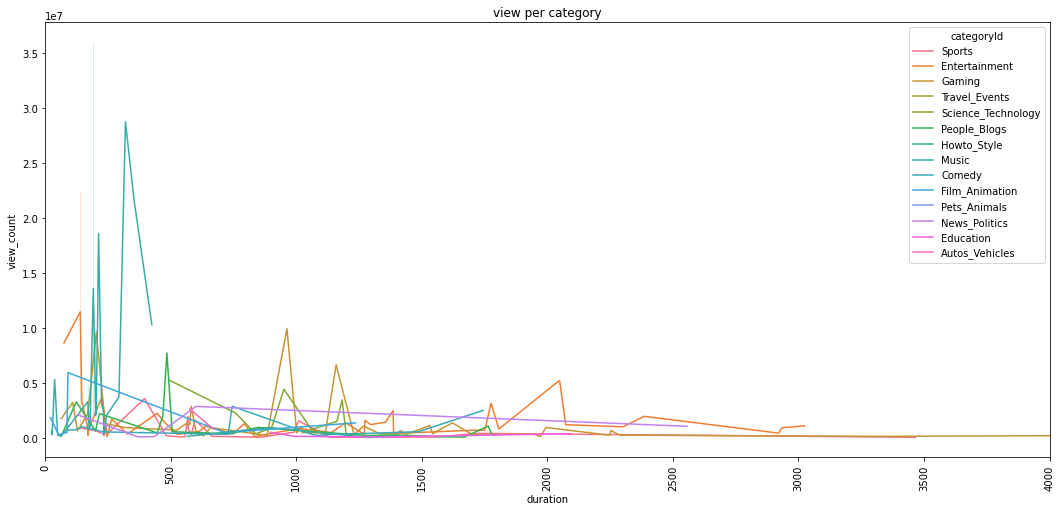

In [74]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='duration',y='view_count',hue='categoryId')
plt.title('view per category')
plt.xticks(rotation=90)
plt.xlim(0,4000)
plt.show()

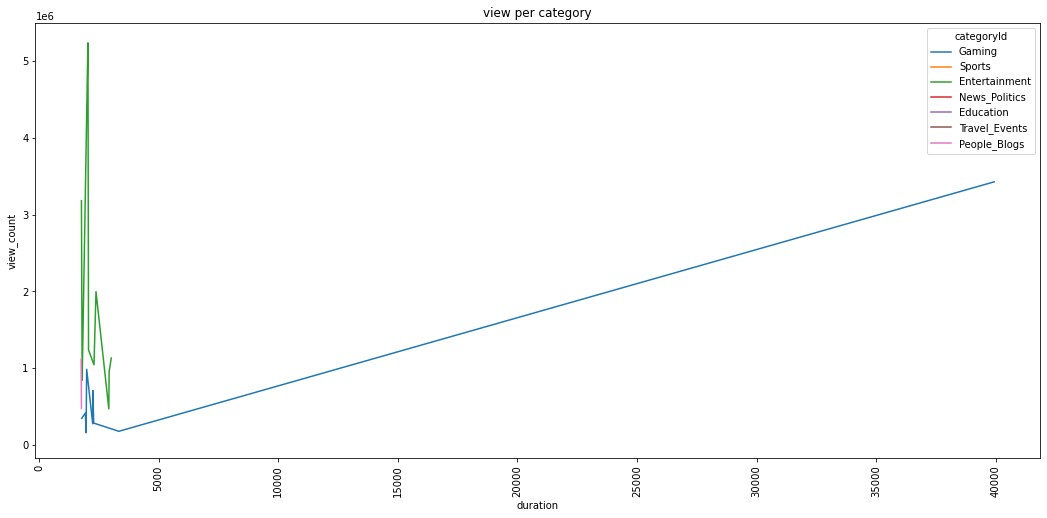

In [70]:
#top 25 rank videos
plt.figure(figsize=(18,8))
sns.lineplot(
    x='duration',
    y='view_count',
    hue='categoryId',
    data=df.nlargest(25, 'duration'))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_13147/3005040862.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


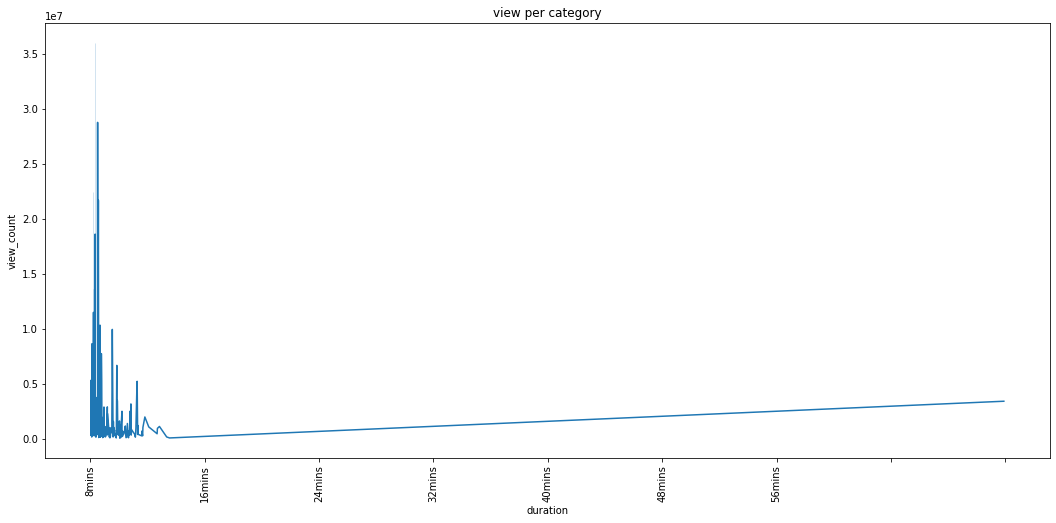

In [55]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='duration',y='view_count')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# What is a viral video? How long does it a take for a video to go viral?Create feature based on virality

In [188]:
df.head(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,description,duration,captions,rank,age,engagement,sponsored,clean,stemmed,lemmatized
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,...,See the highlights from Jake Paul vs Anderson ...,245,False,1,2.478056,0.02004,0,see highlights jake paul vs anderson silva hig...,see highlight jake paul vs anderson silva high...,see highlight jake paul v anderson silva highl...
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-31 00:00:00+00:00,yestheory|seek discomfort|yes theory strangers...,1168864,53667,3307,...,Start your free trial with Shopify at this lin...,1181,False,2,6.994167,0.057231,0,start free trial shopify link httpshopifycomye...,start free trial shopifi link httpshopifycomye...,start free trial shopify link httpshopifycomye...
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-31 00:00:00+00:00,Hockey|NHL|Steve Dangle|Toronto Maple Leafs|Ma...,90257,7248,1946,...,Steve Dangle recaps and analyzes Game 10 of th...,1134,True,3,-6.166944,0.166547,1,steve dangle recaps analyzes game 10 toronto m...,steve dangl recap analyz game 10 toronto mapl ...,steve dangle recap analyzes game 10 toronto ma...
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,...,Phyrexians have taken root in Dominaria as a s...,204,True,4,6.015833,0.001366,0,phyrexians taken root dominaria shocking sleep...,phyrexian taken root dominaria shock sleeper a...,phyrexians taken root dominaria shocking sleep...
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-31 00:00:00+00:00,[none],1246886,85865,1222,...,Wowie!Save money whilst shopping online by dow...,1296,False,5,2.498333,0.072784,0,wowiesave money whilst shopping online downloa...,wowiesav money whilst shop onlin download pouc...,wowiesave money whilst shopping online downloa...
5,HlkORTHy8DU,Big Changes Coming (channel update),2022-10-30 15:00:08+00:00,Eamon & Bec,Travel_Events,2022-10-31 00:00:00+00:00,van life|living in a van|vanlife|eamon and bec...,405505,25403,7843,...,Shop our limited edition Breast Cancer Awarene...,2071,False,6,8.997778,0.140011,0,shop limited edition breast cancer awareness m...,shop limit edit breast cancer awar merch httpe...,shop limited edition breast cancer awareness m...
6,sOY9p5gFa5Q,Ross Chastain's video game move to advance to ...,2022-10-30 21:52:01+00:00,NASCAR,Sports,2022-10-31 00:00:00+00:00,[none],411600,6665,1241,...,Watch Ross Chastain's video-game-style move to...,232,False,7,2.133056,0.028253,0,watch ross chastain ' videogamestyle move pass...,watch ross chastain ' videogamestyl move pass ...,watch ross chastain ' videogamestyle move pas ...
7,7j1lMs7fcIQ,Everything About Irrigation Pivots (Farmers ar...,2022-10-30 21:39:23+00:00,SmarterEveryDay,Science_Technology,2022-10-31 00:00:00+00:00,Smarter|Every|Day|Science|Physics|Destin|Sandl...,500950,36301,2207,...,I want to send you stickers via Patreon: https...,1198,False,8,2.343611,0.090087,0,want send stickers via patreon httpswwwpatreon...,want send sticker via patreon httpswwwpatreonc...,want send sticker via patreon httpswwwpatreonc...
8,fCMa_F8E7-g,Jake Paul After Beating Anderson Silva: I Want...,2022-10-30 05:35:43+00:00,SHOWTIME Sports,Sports,2022-10-31 00:00:00+00:00,showtime|shosports|sports|Floyd Mayweather|Log...,691556,11649,4822,...,"After beating Anderson Silva on SHOWTIME PPV, ...",199,False,9,18.404722,0.044735,0,beating anderson silva showtime ppv jake paul ...,beat anderson silva showtim ppv jake pau

In [57]:
df.publishedAt.nunique()

199

(19288.656255208334, 19297.656255208334)

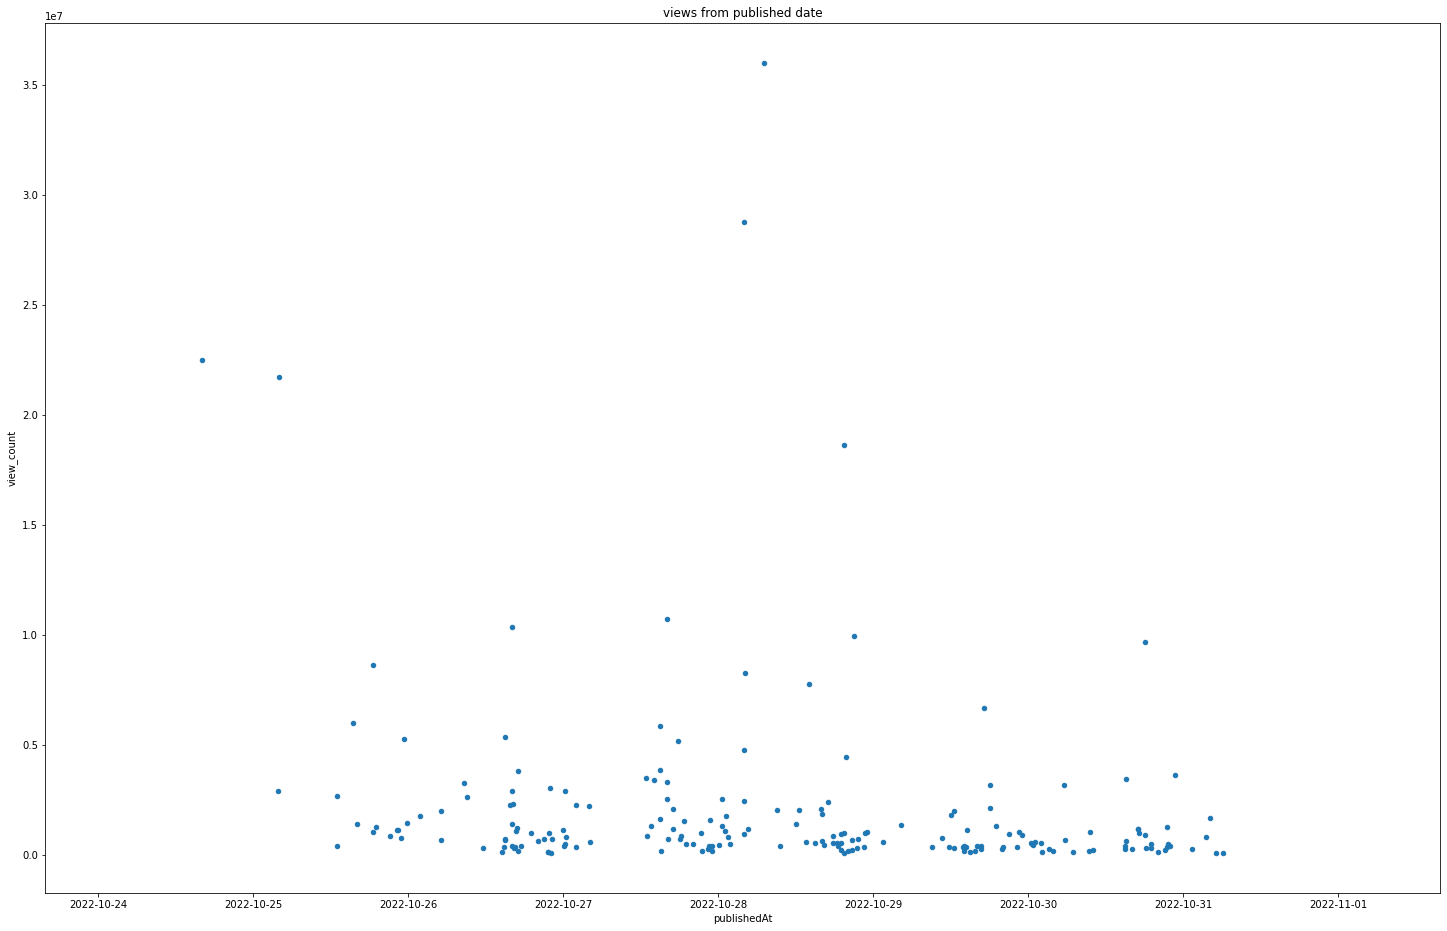

In [132]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].sum().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')
plt.xlim(19288.656255208334,19297.656255208334)

<AxesSubplot:title={'center':'views from published date'}, xlabel='publishedAt', ylabel='view_count'>

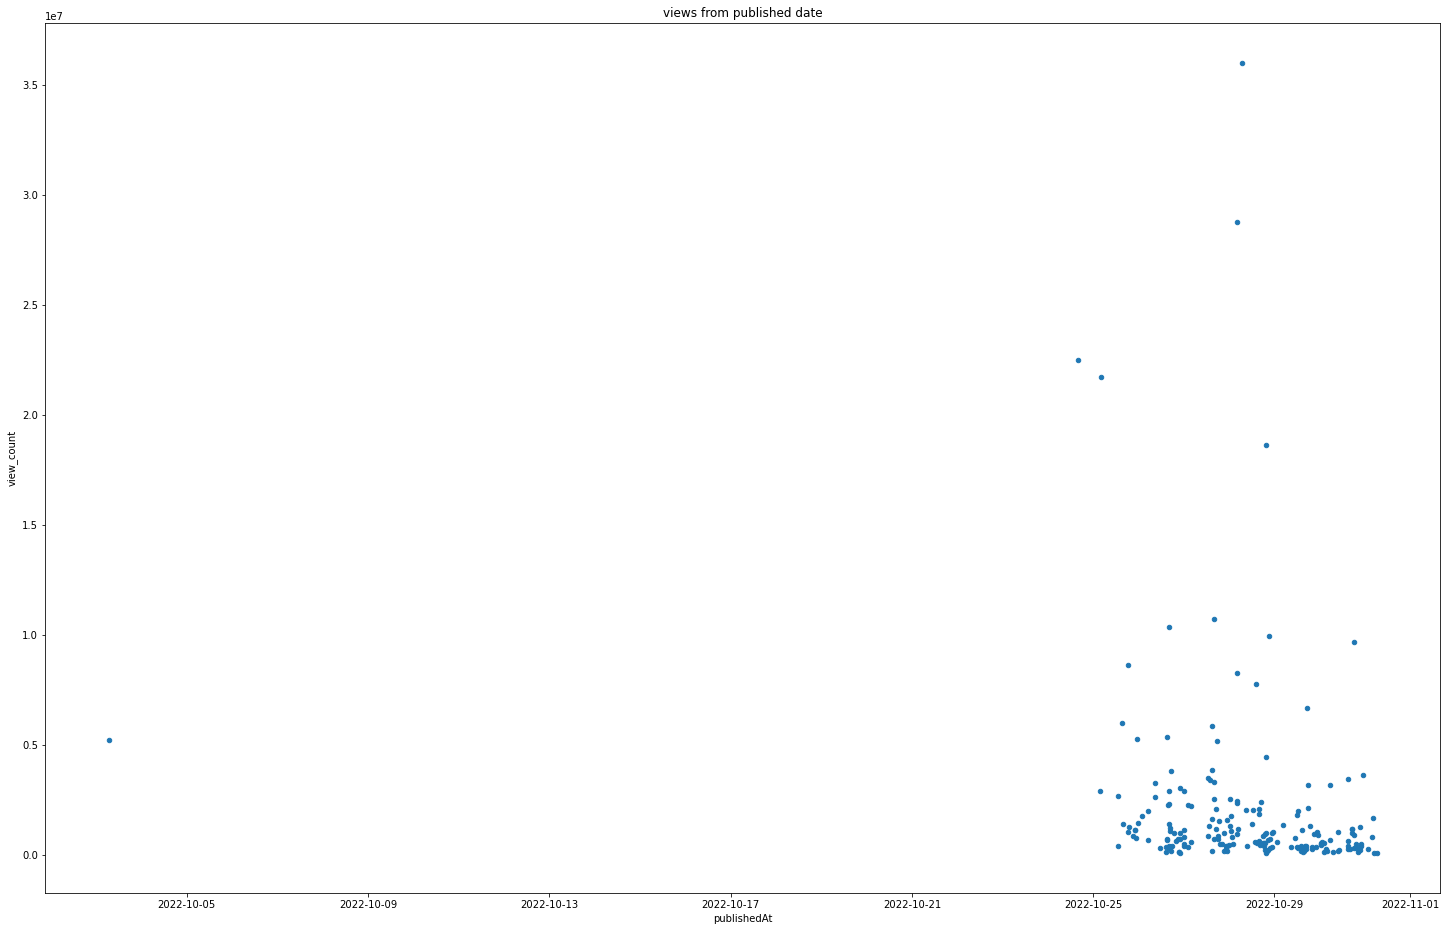

In [133]:
plt.rcParams["figure.figsize"] = (25,16)
publisheds = df.groupby('publishedAt')['view_count'].mean().reset_index()
publisheds.plot(kind='scatter', x='publishedAt', y='view_count', title='views from published date')

In [87]:
df[['publishedAt']].sort_values(by='publishedAt')

,publishedAt
73,2022-10-03 06:30:12+00:00
175,2022-10-24 16:00:40+00:00
185,2022-10-25 03:48:56+00:00
152,2022-10-25 04:00:09+00:00
164,2022-10-25 13:00:15+00:00
...,...
12,2022-10-31 01:19:40+00:00
15,2022-10-31 03:30:10+00:00
32,2022-10-31 04:04:50+00:00
13,2022-10-31 05:00:07+00:00


# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Is rank effect by view count??:

In [82]:
#TREN 
# plt.rcParams["figure.figsize"] = (25,16)
# new_Greenland = df.groupby('trending_date')['view_count'].mean().reset_index()
# new_Greenland.plot(kind='line', x='trending_date', y='view_count', title='views from published date')

<AxesSubplot:xlabel='view_count', ylabel='rank'>

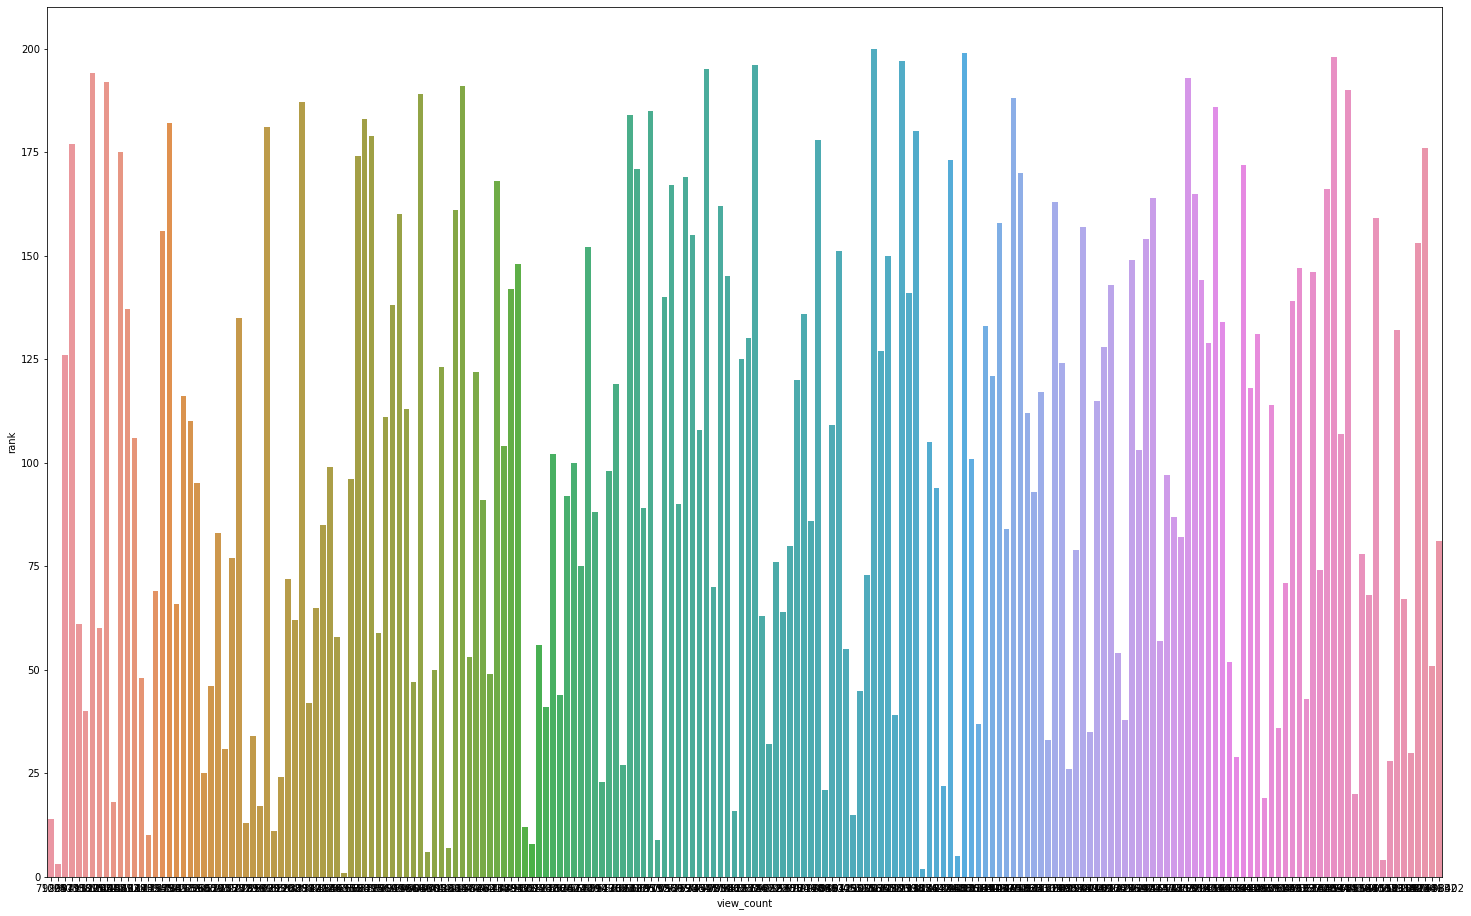

In [136]:
sns.barplot(data=df,x='view_count',y='rank')

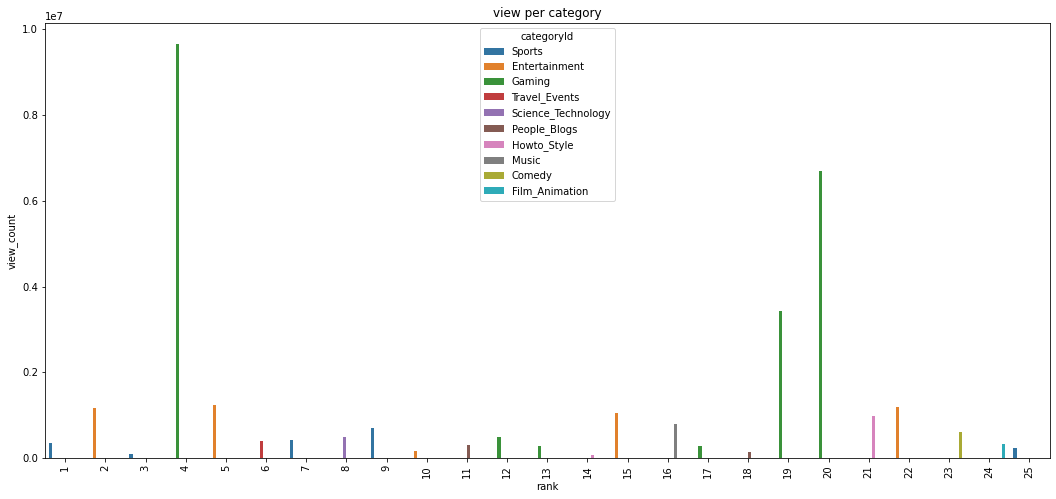

In [173]:
plt.figure(figsize=(18,8))
sns.barplot(
    x='rank',
    y='view_count',
    hue='categoryId',
    data=df.sort_values('rank', ascending=True).head(25))
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Common words on top 25 videos:

In [176]:

import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
def remove_stopwords(article_processed,words_to_add=[],words_to_remove=[]):
    ''' 
    takes in string, and two lists
    creates list of words to remove from nltk, modifies as dictated in arguements
    prints result of processing
    returns resulting string
    '''
    from nltk.corpus import stopwords
    #create the stopword list
    stopwords_list = stopwords.words("english")
    #modify stopword list
    [stopwords_list.append(word) for word in words_to_add]
    [stopwords_list.remove(word) for word in words_to_remove]
    #remove using stopword list
    words = article_processed.split()
    filtered_words = [w for w in words if w not in stopwords_list]
    #filtered_words =[word for word in article_processed if word not in stopwords_list]
    #print("removed ",len(article_processed)-len(filtered_words), "words")
    #join back
    article_without_stopwords = " ".join(filtered_words)
    return article_without_stopwords

def lemmatize(article):
    ''' 
    input article
    makes object, applies to string, and returns results
    '''
    import nltk
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    #use lemmatizer
    lemmatized = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = " ".join(lemmatized)
    return article_lemmatized

def stem(article):
    ''' 
    input string
    create object, apply it to the each in string, rejoin and return
    '''
    import nltk
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = " ".join(stems)
    return article_stemmed

def tokenize(article0):
    ''' 
    input string
    creates object, returns string after object affect
    '''
    import nltk
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article0,return_str=True)
    return article

def basic_clean(article0):
    ''' 
    input string
    lowers cases, makes "normal" characters, and removes anything not expected
    returns article
    '''
    import unicodedata
    import re
    #lower cases
    if isinstance(article0, float):
        article = str(article0).lower()
    else:
        article = article0.lower()
    ## decodes to change to "normal" characters after encoding to ascii from a unicode normalize
    article = unicodedata.normalize("NFKD",article).encode("ascii","ignore").decode("utf-8")
    # removes anything not lowercase, number, single quote, or a space
    article = re.sub(r'[^a-z0-9\'\s]','',article)
    return article



In [178]:
# cleaning the data for world cloud
df = df[df.description.isna()==False]
df["clean"] = [remove_stopwords(tokenize(basic_clean(each))) for each in df.description]
df["stemmed"] = df.clean.apply(stem)
df["lemmatized"] = df.clean.apply(lemmatize)

In [179]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,description,duration,captions,rank,age,engagement,sponsored,clean,stemmed,lemmatized
0,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,...,See the highlights from Jake Paul vs Anderson ...,245,False,1,2.478056,0.02004,0,see highlights jake paul vs anderson silva hig...,see highlight jake paul vs anderson silva high...,see highlight jake paul v anderson silva highl...
1,d2Dw-PuNZSE,Dark Secrets of the World’s Most Isolated Island,2022-10-30 17:00:21+00:00,Yes Theory,Entertainment,2022-10-31 00:00:00+00:00,yestheory|seek discomfort|yes theory strangers...,1168864,53667,3307,...,Start your free trial with Shopify at this lin...,1181,False,2,6.994167,0.057231,0,start free trial shopify link httpshopifycomye...,start free trial shopifi link httpshopifycomye...,start free trial shopify link httpshopifycomye...
2,nUDTWLfrUsg,"LFR16 - Game 10 - OVER - TOR 3, ANA 4 (OT)",2022-10-31 06:10:01+00:00,SteveDangle,Sports,2022-10-31 00:00:00+00:00,Hockey|NHL|Steve Dangle|Toronto Maple Leafs|Ma...,90257,7248,1946,...,Steve Dangle recaps and analyzes Game 10 of th...,1134,True,3,-6.166944,0.166547,1,steve dangle recaps analyzes game 10 toronto m...,steve dangl recap analyz game 10 toronto mapl ...,steve dangle recap analyzes game 10 toronto ma...
3,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,...,Phyrexians have taken root in Dominaria as a s...,204,True,4,6.015833,0.001366,0,phyrexians taken root dominaria shocking sleep...,phyrexian taken root dominaria shock sleeper a...,phyrexians taken root dominaria shocking sleep...
4,MIHPNoRJ1p0,Scoring 1 AMAZING Goal From 1-40 Yards,2022-10-30 21:30:06+00:00,ChrisMD,Entertainment,2022-10-31 00:00:00+00:00,[none],1246886,85865,1222,...,Wowie!Save money whilst shopping online by dow...,1296,False,5,2.498333,0.072784,0,wowiesave money whilst shopping online downloa...,wowiesav money whilst shop onlin download pouc...,wowiesave money whilst shopping online downloa...


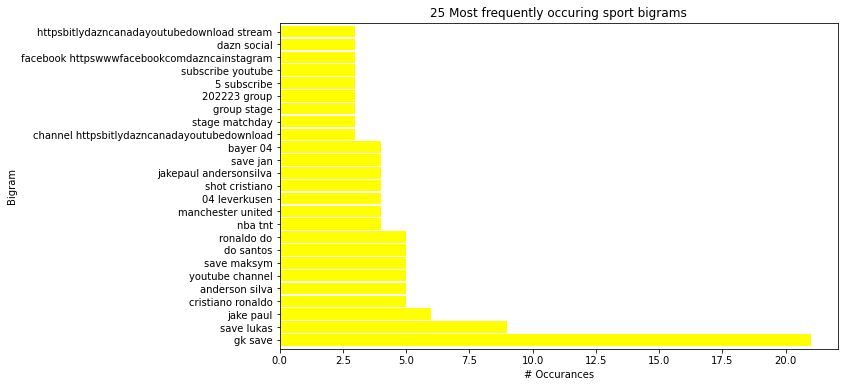

In [195]:
Sports = ' '.join(df[df.categoryId == 'Sports'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Sports, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='yellow', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring sport bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

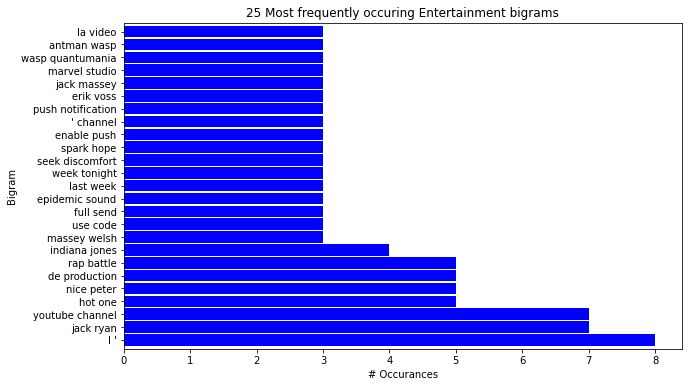

In [193]:
Ruby = ' '.join(df[df.categoryId == 'Entertainment'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

[]

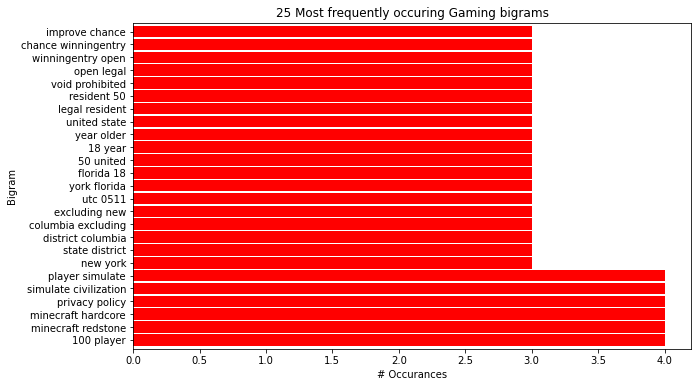

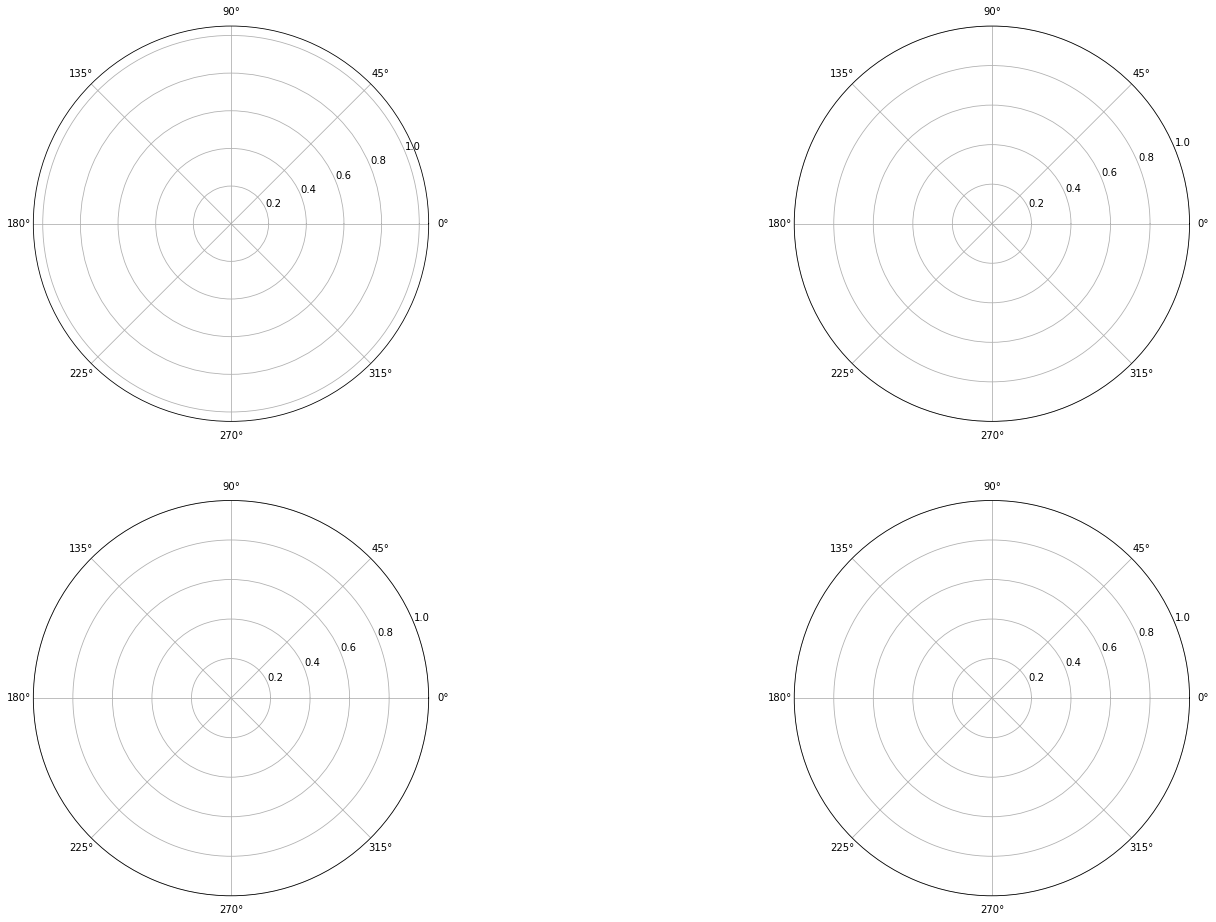

In [251]:
Ruby = ' '.join(df[df.categoryId == 'Gaming'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Gaming bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot()

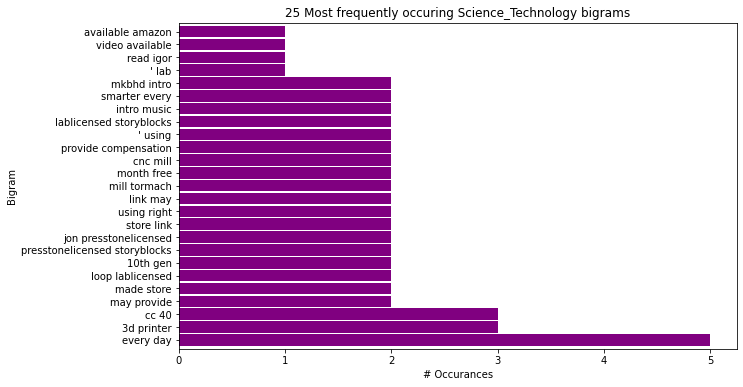

In [191]:
Ruby = ' '.join(df[df.categoryId == 'Science_Technology'].lemmatized).split()
top_20_ham_bigrams = (pd.Series(nltk.ngrams(Ruby, 2))
                      .value_counts()
                      .head(25))
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('25 Most frequently occuring Science_Technology bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

    # make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# Comparing like from all categorys to other caregorys

In [246]:
def explore_ttest_lang_setcount(df,population_name="categoryId",numerical_feature="likes"):
    ''' 
    input df dataset and two strings (discrete and continous)
    does a ttest prints results, plots relation
    returns nothing
    '''
    
    #plot the results
    plt.figure(figsize=(25,25))
    plt.suptitle(f"Sample Values Compared for Non-Repeating Words", fontsize=12, y=0.99)
    i=0
    for feature in df[population_name].unique():
        temp1=df.copy()
        #plots out a grouping of the features
        i+=1
        ax = plt.subplot(5,3,i)
        temp1[population_name] = np.where(temp1[population_name]==feature,feature,"Other categoryId")
        temp1[[numerical_feature,population_name]].groupby(population_name).agg("mean").plot.bar(rot=0,color="blue",edgecolor="white",linewidth=5,ax=ax)
        ax.axhline(y=temp1[numerical_feature].mean(),label=f"Mean {(round(temp1[numerical_feature].mean(),3))}",color="red",linewidth=3)
        ax.set_ylabel("% of Non-Repeating Words")
        plt.legend()
        ax.set_title(f"{feature} means for likes",fontsize=8)
    plt.show()

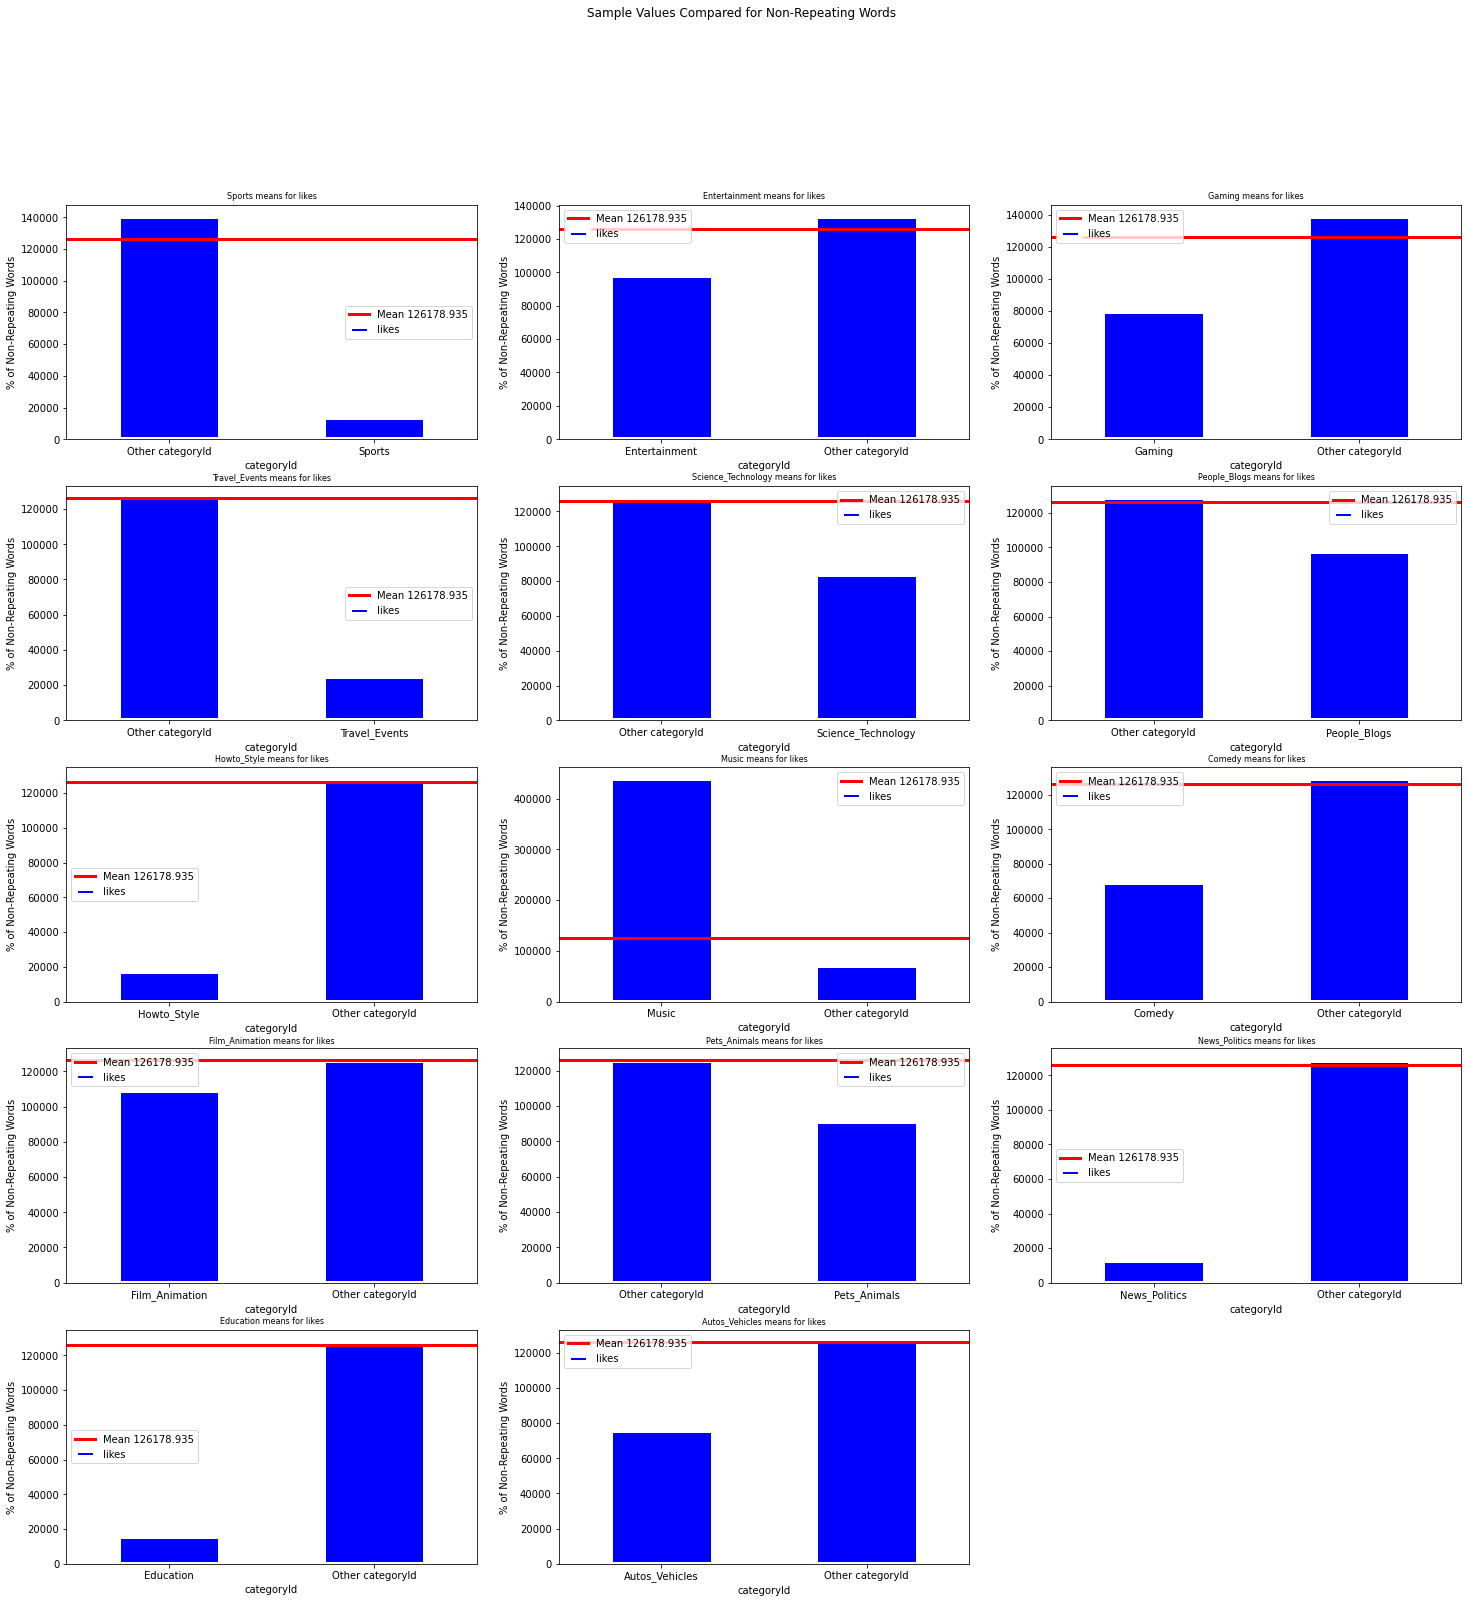

In [252]:
explore_ttest_lang_setcount(df)

# <hr style="border-bottom: 10px groove black; margin-top: 1px; margin-bottom: 1px"></hr>
# word count from all categoryId Obtain from lemmatized:

In [255]:
def graph2(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.catplot(data=lang, x="count_set_words", y="Language", kind="bar",height=11,aspect=1.5)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

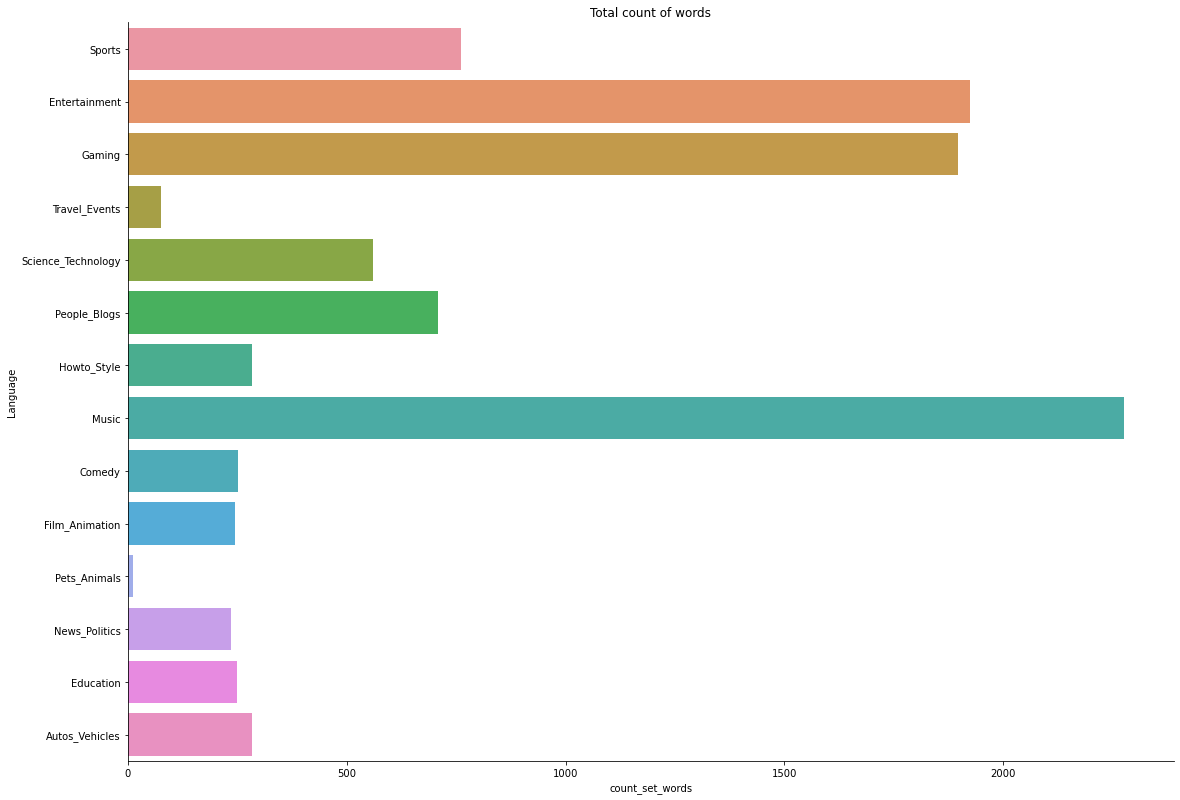

0      762
1     1923
2     1897
3       77
4      560
5      709
6      285
7     2275
8      251
9      246
10      11
11     236
12     250
13     285
Name: count_set_words, dtype: int64


In [256]:
graph2(df)

In [305]:
def graph3(df):
    lang_dict={"Language":[],"Words":[]}
    for lang in df["categoryId"].unique():
        lang_dict["Language"].append(lang)
        lang_dict["Words"].append((" ".join(df[df["categoryId"]==lang]["lemmatized"])).replace("'","").split())
    lang = pd.DataFrame(lang_dict)
    most_common_list=[]
    for i,each in enumerate(lang["Language"].unique()):
        looped_series = pd.Series(lang["Words"].loc[i]).value_counts()
        most_common = looped_series[looped_series > looped_series.quantile(.95)]
        most_common_list.append(most_common[:5].index.tolist())
    lang["most_common"] = pd.Series(most_common_list)
    lang["count_set_words"] = lang["Words"].apply(set).apply(len)
    sns.pointplot(data=lang, x="count_set_words", y="Language",errorbar=("pi", 100), capsize=.4, join=True, color=".5",)
    plt.title('Total count of words')
    plt.show()
    print(lang.count_set_words)

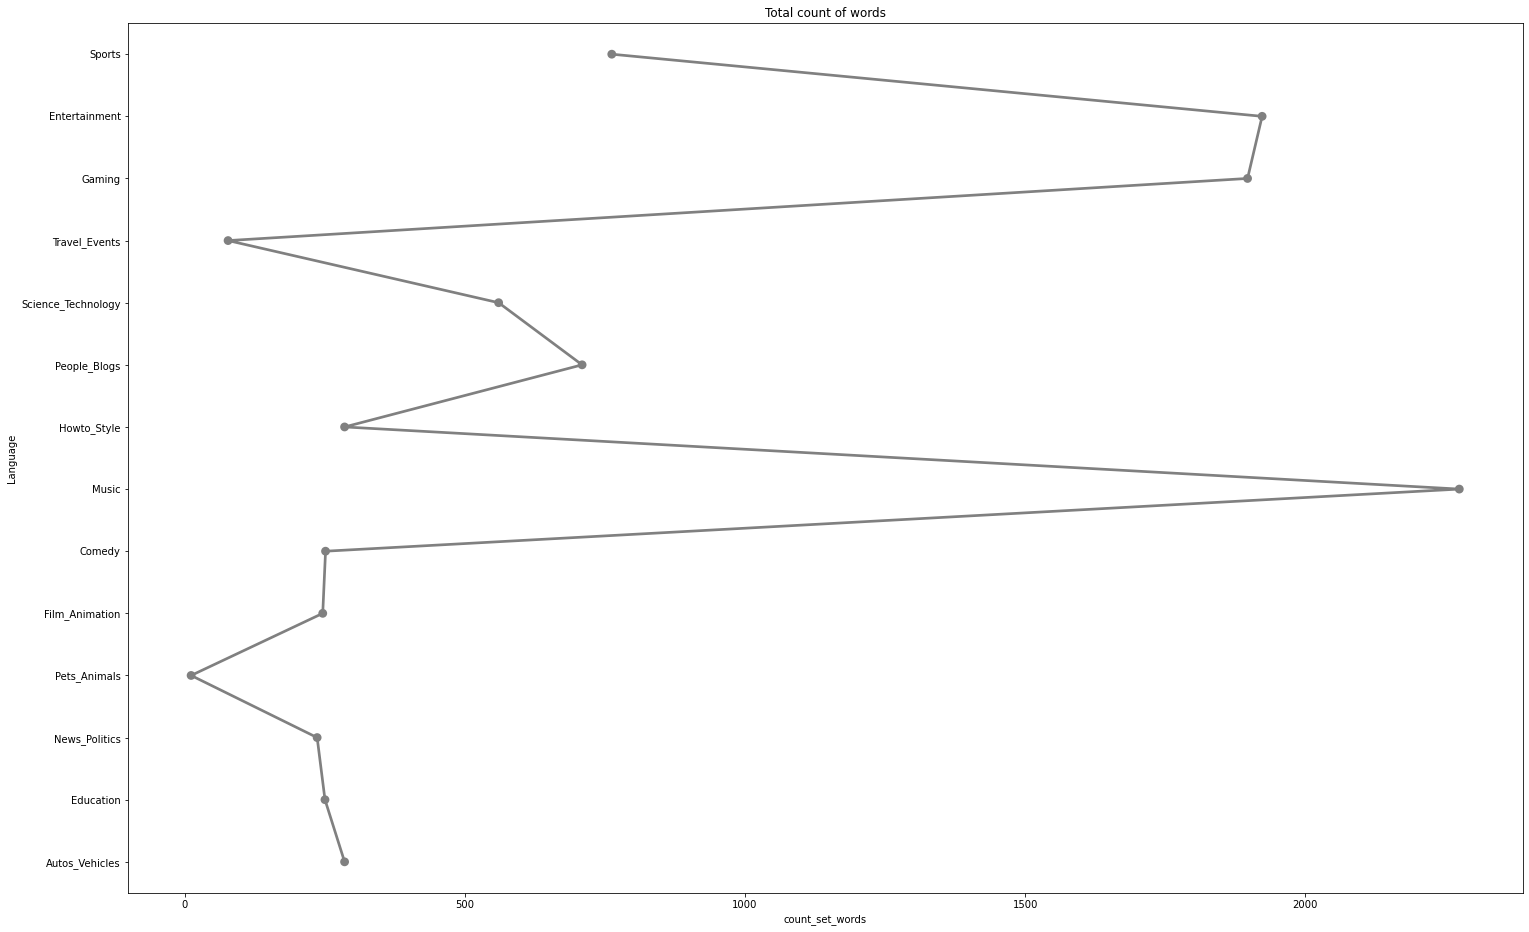

0      762
1     1923
2     1897
3       77
4      560
5      709
6      285
7     2275
8      251
9      246
10      11
11     236
12     250
13     285
Name: count_set_words, dtype: int64


In [306]:
graph3(df)